# Project - seaborn
---

In this project you will analyze and visualize data on the modern Olympic Games, from the first games in Athens in 1896 to the Summer Olympics of Rio in 2016.

You will work with 2 files:
1. [athlete_events.csv](../Data/athlete_events.csv)
2. [noc_regions.csv](../Data/noc_regions.csv)

The dataset include Summer and Winter Olympics data.

Use pandas to answer the following questions, then replicate the given visualizations using Matplotlib and seaborn:

1. What is the total number of athletes in each game?
2. What is the total number of male vs. female athletes in each game?
3. What is the growth rate of female participation over years
4. Who are the top medal winning athletes?
5. Who are the top medal winning countries?
6. What is the age distribution of males vs. females
7. What are the top summer sporting events?
8. What are the top summer sporting events?

_[Link to Original Data Source](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)_

> This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set theme (optional)

sns.set_theme()

## Step 1: Read and Explore Data

In [3]:
# Read athletes df
athletes_df = pd.read_csv('athlete_events.csv')

In [4]:
# Read noc df
regions_df = pd.read_csv('noc_regions.csv')

In [5]:
# Explore dfs
print("Athletic events:", athletes_df.head())
print()
print("NOC regions:", regions_df.head())

Athletic events:    ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2        

In [6]:
# Explore dfs using info()
print("Athletic events:", athletes_df.info())
print()
print("NOC rgions:", regions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
Athletic events: None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ---

In [7]:
# Find missing values in both dfs
print(athletes_df.isnull().sum())
print()
print(regions_df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

NOC         0
region      3
notes     209
dtype: int64


## Step 2: Data Preparation

### Handle Missing Values in `athletes` DataFrame

Assume missing values in `Medal` column mean that the athlete won no medals.
Leave this column as is for now.

For the remaining missing values:
1. Fill the missing `Age` values with mean age depending on the values in the `Sex` column. For example, if we're missing the age for a female athlete, fill in their age with the average age of other female athletes. Start with this column.

2. Follow a similar approach for the `Height` and `Weight` columns. Fill in the missing values depending on the average height and weight for athletes of the same gender.

In [8]:
# Replace missing "Age" values with mean age depending on values in "Sex"
mean_ages = athletes_df.groupby('Sex')['Age'].mean()

def fill_age(row):
    if pd.isna(row['Age']):
        return mean_ages[row['Sex']]
    return row['Age']

athletes_df['Age'] = athletes_df.apply(fill_age, axis=1)

In [9]:
# Replace missing "Height" and "Weight" values depending on values in "Sex"
mean_heights = athletes_df.groupby('Sex')['Height'].mean()

def fill_height(row):
    if pd.isna(row['Height']):
        return mean_heights[row['Sex']]
    return row['Height']

athletes_df['Height'] = athletes_df.apply(fill_height, axis=1)

# Replace missing "Weight" values depending on values in "Sex"
mean_weights = athletes_df.groupby('Sex')['Weight'].mean()

def fill_weight(row):
    if pd.isna(row['Weight']):
        return mean_weights[row['Sex']]
    return row['Weight']

athletes_df['Weight'] = athletes_df.apply(fill_weight, axis=1)

In [10]:
# Confirm that dataset has no more missing values (Except "Medal" column)
print(athletes_df.isnull().sum())

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


### Handle Missing Values in `noc` DataFrame

Fill in the missing values in the `region` column with values from the `notes` column.

In [11]:
# Fill missing values in noc "region" column with values from "notes" column
regions_df['region'] = regions_df['region'].fillna(regions_df['notes'])

In [12]:
# Confirm that "region" column has no more missing values
print(regions_df.isnull().sum())

NOC         0
region      0
notes     209
dtype: int64


### Merge DataFrames

The `head()` of your new merged DataFrame should look like this:

In [14]:
# Run this cell to see the example
pd.read_csv('sample_merged_df.csv')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [15]:
# Merge athletes and noc DataFrames
merged_df = pd.merge(athletes_df, regions_df, on='NOC', how='inner')
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


## Data Analysis and Visualization

- Make sure you don't run the cells directly above the displayed graphs. If you do, it will erase them. You can redownload the notebook to retrieve the graphs.

- All the code for plotting a figure should be in the same cell. If you separate your code into multiple cells, you may not get the desired output.

- It's ok if your visualizations aren't identical to the ones displayed in terms of colours or styling, as long as the values represented are the same.

### 1. Total Number of Athletes in each Olympic Game

In [16]:
# Total # of athletes
# Group the data by 'Games' and count the number of unique athletes in each group
athletes_per_game = athletes_df.groupby('Games')['ID'].nunique().reset_index()

# Rename the columns for clarity
athletes_per_game.columns = ['Games', 'Number of Athletes']

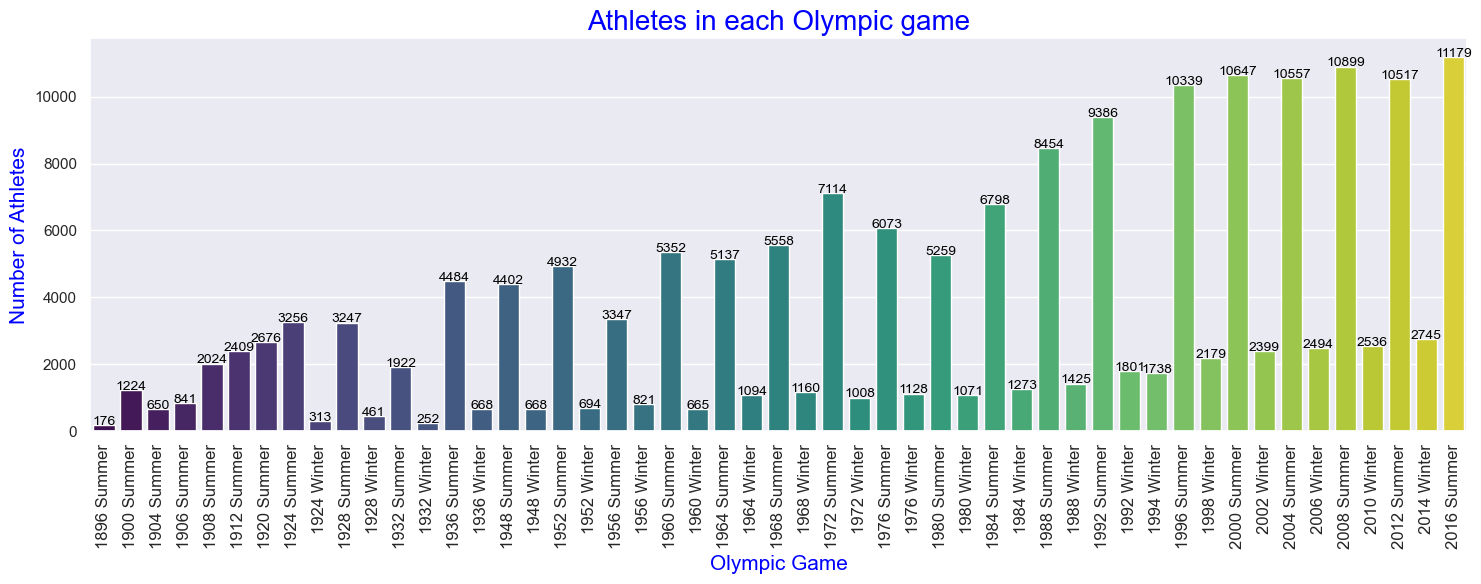

In [17]:
# Visualization
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Games', y='Number of Athletes', data=athletes_per_game, hue='Games', palette='viridis', dodge=False, legend=False)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=12)

# Set title and labels with custom font size and colors
plt.title('Athletes in each Olympic game', fontsize=20, color='blue')
plt.xlabel('Olympic Game', fontsize=15, color='blue')
plt.ylabel('Number of Athletes', fontsize=15, color='blue')

# Add counts on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

<img src='../Data/images/plot1.png'>

### 2. Total Number of Male vs. Female Athletes in each Olympic Game

In [18]:
# Total # of male vs. female athletes
# Group the data by 'Games' and 'Sex', then count the number of athletes in each group
athletes_per_game_sex = merged_df.groupby(['Games', 'Sex']).size().unstack().reset_index()

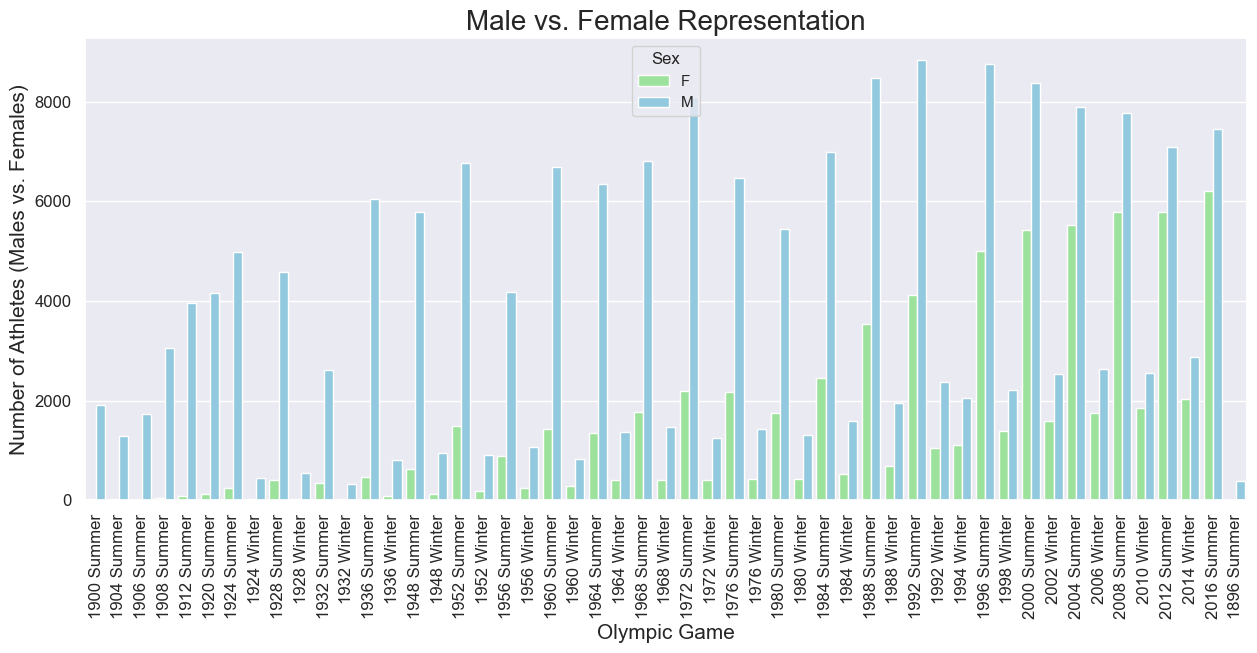

In [19]:
# Visualization
df = pd.DataFrame(athletes_per_game_sex)

# Melt the DataFrame to long format
df_long = df.melt(id_vars='Games', var_name='Sex', value_name='Count')

# Filter out rows with NaN values
df_long = df_long.dropna(subset=['Count'])

# Define a custom color palette
custom_palette = {'F': 'lightgreen', 'M': 'skyblue'}

# Plot the data
plt.figure(figsize=(15, 6))
sns.barplot(x='Games', y='Count', hue='Sex', data=df_long, palette=custom_palette)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Olympic Game', fontsize=15)
plt.ylabel('Number of Athletes (Males vs. Females)', fontsize=15)
plt.title('Male vs. Female Representation', fontsize=20)
plt.legend(title='Sex', loc='upper center')
plt.show()

<img src='../Data/images/plot2.png'>

### 3. Growth of Female Participation over Years

In [20]:
# Calculate yearly growth (percentage)
# filter the data for female athletes
female_df = athletes_df[athletes_df['Sex'] == 'F']

# group the female data by year and count the number of unique athletes in each year
female_participation = female_df.groupby('Year')['ID'].nunique().reset_index()

# calculate the percentage growth compared to the previous year
female_participation['Yearly Growth (%)'] = female_participation['ID'].pct_change() * 100

female_participation

,Year,ID,Yearly Growth (%)
0,1900,23,NaN
1,1904,6,-73.913043
2,1906,6,0.000000
3,1908,44,633.333333
4,1912,53,20.454545
5,1920,78,47.169811
6,1924,169,116.666667
7,1928,340,101.183432
8,1932,222,-34.705882
9,1936,441,98.648649


posx and posy should be finite values
posx and posy should be finite values


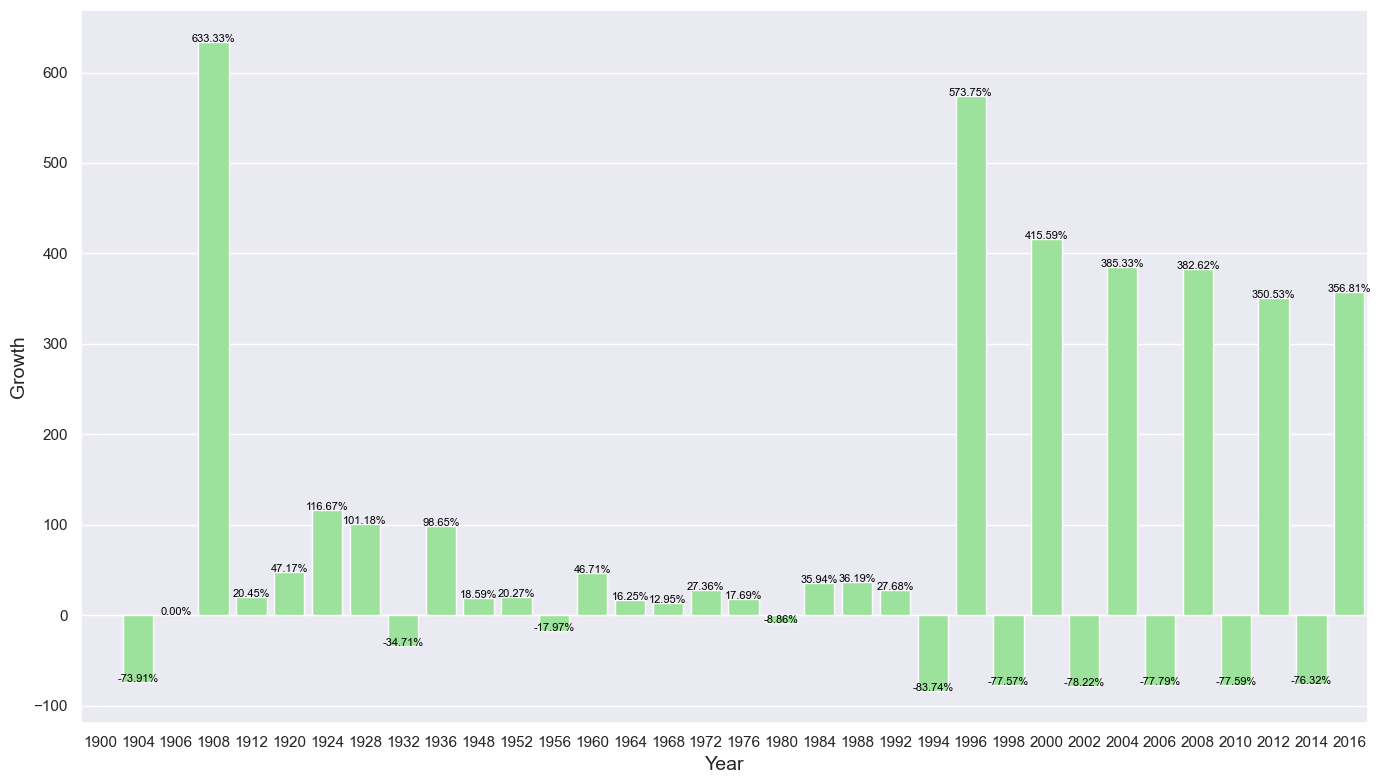

In [21]:
# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=female_participation, x='Year', y='Yearly Growth (%)', color='lightgreen')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth', fontsize=14)
plt.grid(axis='y', color='white')
plt.gca().xaxis.grid(False)
plt.xticks(rotation=0)

# Add labels on top of each bar
for index, row in female_participation.iterrows():
    plt.text(row.name, row['Yearly Growth (%)'], f'{row["Yearly Growth (%)"]:.2f}%', color='black', ha="center", fontsize=8)
    
plt.tight_layout()
plt.show()

<img src='../Data/images/plot3.png'>

### 4. Top 20 Medal Winning Athletes

In [22]:
# Top 20 athletes with most medals
# group the data by athlete and count the number of medals
athlete_medals = athletes_df.groupby('Name')['Medal'].count().reset_index()

# sort the athletes by the number of medals in descending order and select the top 20
top_20_athletes = athlete_medals.sort_values(by='Medal', ascending=False).head(20)

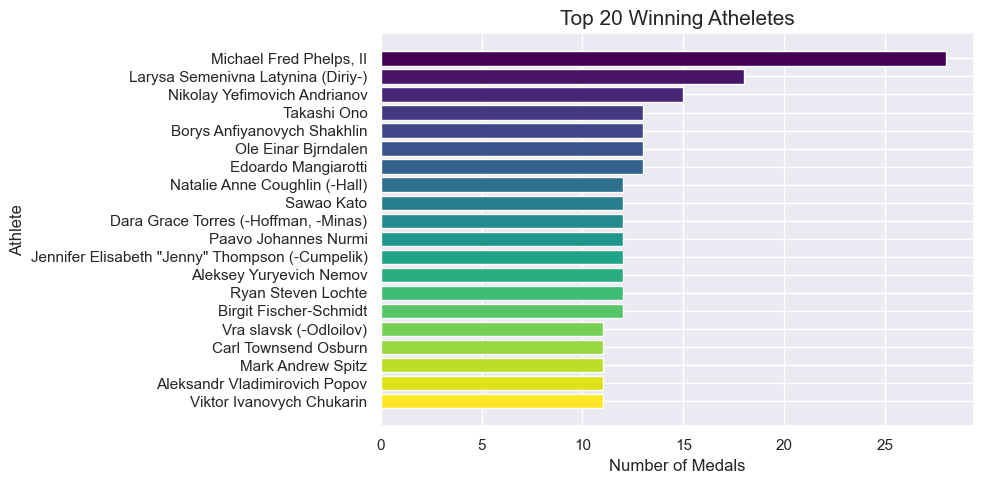

In [23]:
# Visualization
plt.figure(figsize=(10, 5))
bars = plt.barh(top_20_athletes['Name'], top_20_athletes['Medal'], color=plt.cm.viridis(np.linspace(0, 1, len(top_20_athletes))))  # Adjust bar color
plt.ylabel('Athlete', fontsize=12) 
plt.xlabel('Number of Medals', fontsize=12)
plt.grid(axis='x', color='white')
plt.gca().xaxis.grid(True
                    )
plt.title('Top 20 Winning Atheletes', fontsize=15)

# Invert y-axis to display the highest medal count at the top
plt.gca().invert_yaxis()  

plt.tight_layout()

plt.show()

<img src='../Data/images/plot4.png'>

### 5. Top 10 Medal Winning Countries

In [24]:
# Top 10 countries with most medals
# group the data by country and count the number of medals
country_medals = athletes_df.groupby('Team')['Medal'].count().reset_index()

# sort the countries by the number of medals in descending order and select the top 10
top_10_countries = country_medals.sort_values(by='Medal', ascending=False).head(10)

top_10_countries

,Team,Medal
1095,United States,5219
976,Soviet Union,2451
398,Germany,1984
412,Great Britain,1673
361,France,1550
506,Italy,1527
1010,Sweden,1434
65,Australia,1306
173,Canada,1243
476,Hungary,1127


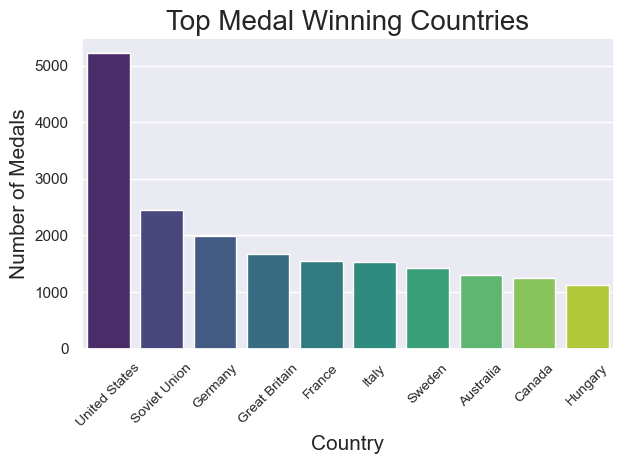

In [25]:
# Visualization
sns.barplot(x='Team', y='Medal', data=top_10_countries, palette='viridis', hue='Team', dodge=False)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of Medals', fontsize=15)
plt.title('Top Medal Winning Countries', fontsize=20)
plt.xticks(rotation=45, fontsize=10)  # Adjust xtick rotation and font size
plt.gca().xaxis.grid(False)  # Remove horizontal gridlines

plt.tight_layout()
plt.show()

<img src='../Data/images/plot5.png'>

### 6. Age Distribution of Male vs. Female Over Years

In [26]:
# Visualization
# group the data by year, sex, and age, and count the number of athletes in each group
age_distribution = athletes_df.groupby(['Year', 'Sex', 'Age']).size().reset_index(name='Count')

# filter the data to include only rows where the age is not missing
age_distribution = age_distribution[~age_distribution['Age'].isnull()]

C:\Users\milto\AppData\Local\Temp\ipykernel_9380\1147290230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_distribution, x='Year', y='Age', palette='Set3')


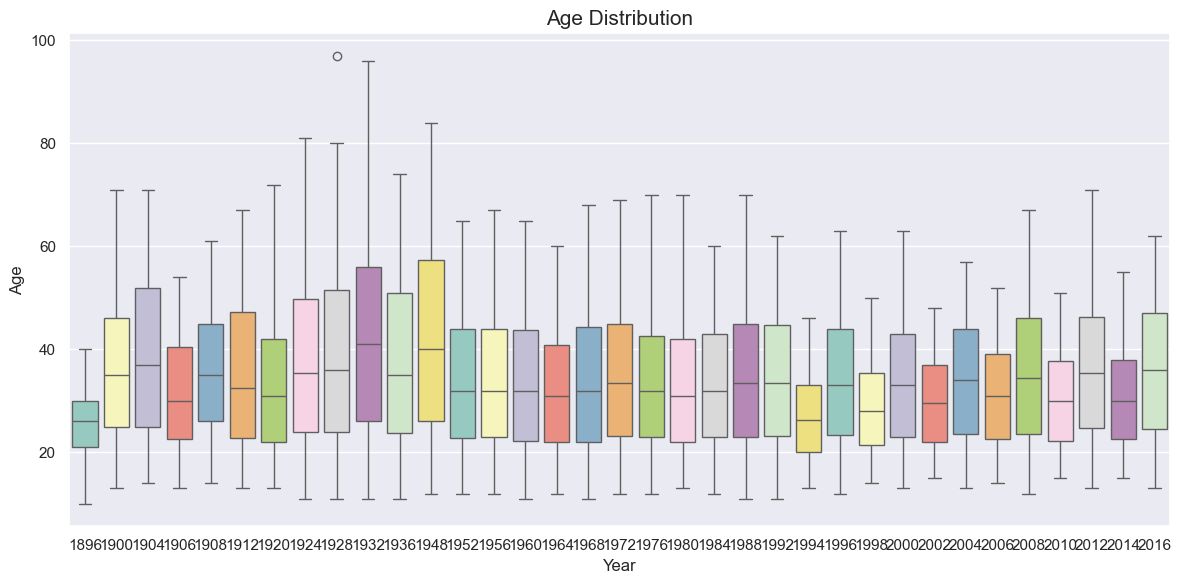

In [27]:
age_distribution = pd.DataFrame(age_distribution)

plt.figure(figsize=(12, 6))
sns.boxplot(data=age_distribution, x='Year', y='Age', palette='Set3')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age Distribution', fontsize=15)
plt.tight_layout()
plt.show()

<img src='../Data/images/plot6.png'>

### 7. Top 4 Summer Sporting Events

In [29]:
# Top summer sporting events by "Sex"
# Filter the data to include only Summer Olympic Games
summer_events = athletes_df[athletes_df['Season'] == 'Summer']

# Group the data by Event and Sex, and count the number of athletes in each group
top_events = summer_events.groupby(['Event', 'Sex']).size().unstack()

# Find the top 4 events for each sex
top_male_events = top_events['M'].nlargest(4)
top_male_events

Event
Football Men's Football        5733.0
Hockey Men's Hockey            3958.0
Water Polo Men's Water Polo    3358.0
Basketball Men's Basketball    3280.0
Name: M, dtype: float64

In [30]:
top_female_events = top_events['F'].nlargest(4)
top_female_events

Event
Volleyball Women's Volleyball               1543.0
Gymnastics Women's Individual All-Around    1539.0
Gymnastics Women's Balance Beam             1531.0
Gymnastics Women's Uneven Bars              1530.0
Name: F, dtype: float64

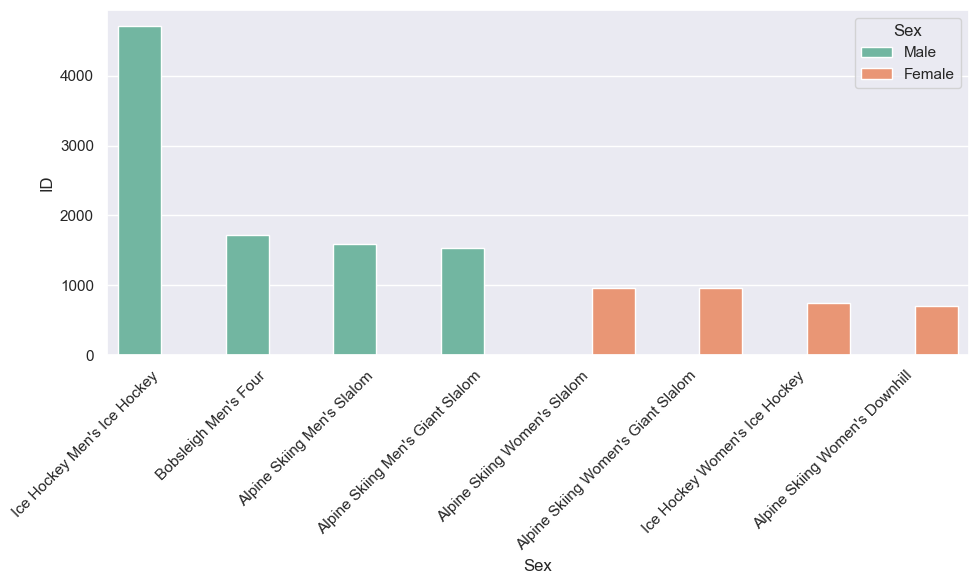

In [43]:
# Visualization
combined_events = pd.concat([top_male_events, top_female_events], axis=1)
combined_events.columns = ['Male', 'Female']

# Reset index to make 'Event' a regular column for plotting
combined_events = combined_events.reset_index()

# Melt the DataFrame to plot easily with seaborn
melted_events = combined_events.melt(id_vars='Event', var_name='Sex', value_name='Athlete Count')       

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Event', y='Athlete Count', hue='Sex', data=melted_events, palette='Set2')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

<img src='../Data/images/plot7.png'>

### 8. Top 4 Winter Sporting Events

In [31]:
# Top winter sporting events by "Sex"
# Filter the data to include only Winter Olympic Games
winter_events = athletes_df[athletes_df['Season'] == 'Winter']

# Group the data by Event and Sex, and count the number of athletes in each group
top_events = winter_events.groupby(['Event', 'Sex']).size().unstack(fill_value=0)

# Find the top 4 events for each sex
top_male_events = top_events['M'].nlargest(4)
top_male_events

Event
Ice Hockey Men's Ice Hockey         4702
Bobsleigh Men's Four                1715
Alpine Skiing Men's Slalom          1593
Alpine Skiing Men's Giant Slalom    1535
Name: M, dtype: int64

In [32]:
top_female_events = top_events['F'].nlargest(4)
top_female_events

Event
Alpine Skiing Women's Slalom          966
Alpine Skiing Women's Giant Slalom    961
Ice Hockey Women's Ice Hockey         754
Alpine Skiing Women's Downhill        708
Name: F, dtype: int64

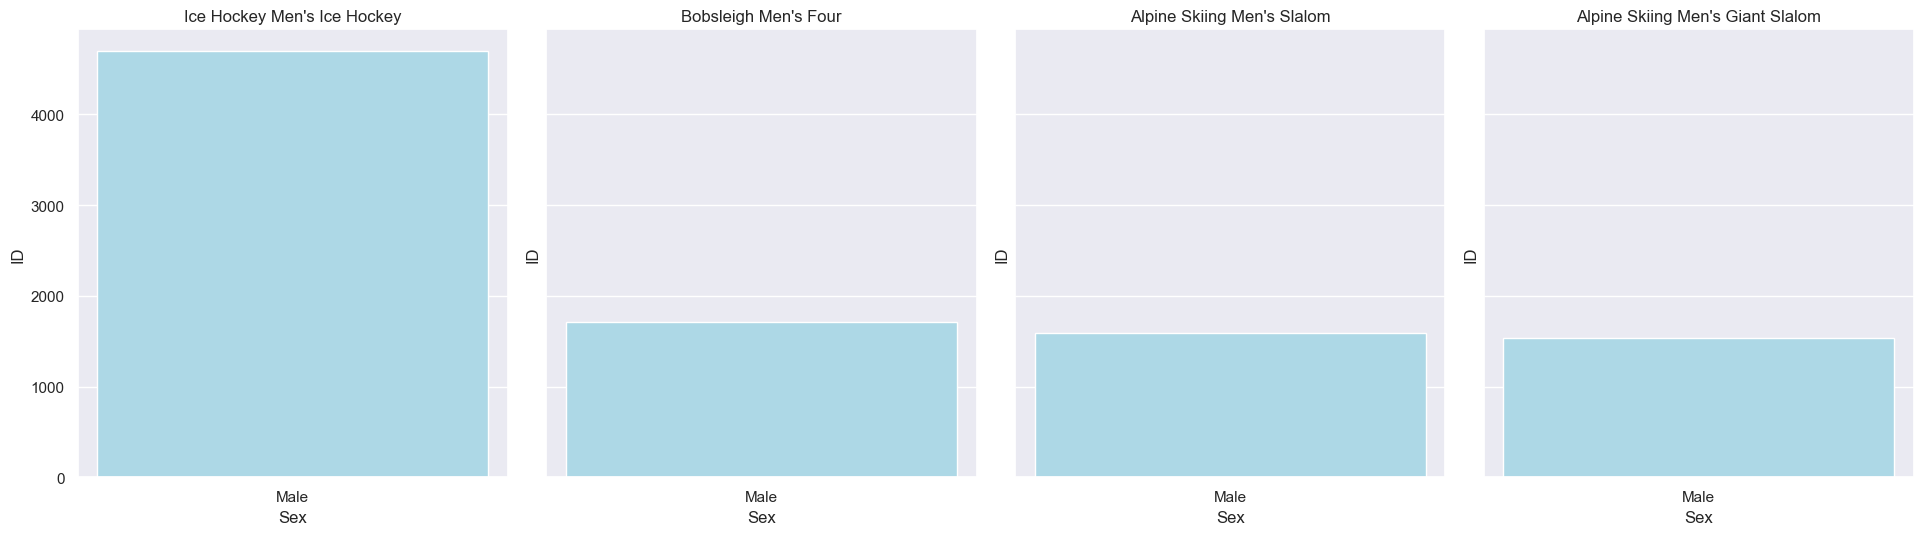

In [33]:
# Visualization
# Plot top male events
fig, axes = plt.subplots(1, len(top_male_events), figsize=(20, 6), sharey=True)

for ax, (event, count) in zip(axes, top_male_events.items()):
    ax.bar(['Male'], count, color='lightblue')
    ax.set_title(event)
    ax.set_xlabel('Sex')
    ax.set_ylabel('ID')
    # Enable horizontal gridlines
    ax.yaxis.grid(True)
    # Disable vertical gridlines
    ax.xaxis.grid(False)  

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()

<img src='../Data/images/plot8.png'>

## The End!